<a href="https://colab.research.google.com/github/marchuah/git_practise/blob/master/AML-EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The focus of this notebook will be to explore the following ways of embedding the email text to see which is more information for a model

- Sentence transformers e.g. SBERT, transformer models - Calvin
- Keyword extraction (spacy, nltk, gliner, etc) - Cresencio
- Word cloud (word frequency, etc) - Marcus
- Text metadata e.g. length, sentiment e.g. https://huggingface.co/bhadresh-savani/distilbert-base-uncased-emotion?text=I+feel+a+bit+let+down - Zin Zin

# Setup

## Packages

In [ ]:
%pip install -U "sentence-transformers==4.1.0"

## Imports

In [1]:
import pandas as pd
import numpy as np
import torch
from sentence_transformers import SentenceTransformer
from google.colab import drive
from transformers import pipeline
import os

In [2]:
drive.mount('/content/drive', force_remount=True)

%cd "/content/drive/MyDrive/AML Project/datasets"

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1zUk7qvNNU9Bmxm7sLT7EmS_hv7HaleFK/AML Project/datasets


# Dataset

In [3]:
train = pd.read_csv("train.csv")

# Metadata

In [ ]:
train.loc[:, 'email_text'] = train.loc[:, 'email_text'].astype(str)

train.loc[:, 'email_length'] = train.loc[:, 'email_text'].apply(lambda x: len(x))

In [ ]:
train

,email_text,phishing,urls,email_length
0,"Never agree to be a loser Buck up, your troubl...",1,1,299
1,Befriend Jenna Jameson \nUpgrade your sex and ...,1,1,105
2,CNN.com Daily Top 10 >+=+=+=+=+=+=+=+=+=+=+=+=...,1,1,3939
3,Re: svn commit: r619753 - in /spamassassin/tru...,0,1,24569
4,SpecialPricesPharmMoreinfo \nWelcomeFastShippi...,1,1,202
...,...,...,...,...
143144,date a lonely housewife always wanted to date ...,1,0,237
143145,request submitted : access request for anita ....,0,0,477
143146,"re : important - prc mtg hi dorn & john , as y...",0,0,1214
143147,press clippings - letter on californian utilit...,0,0,213


# Sentence Transformers

In [ ]:
if os.path.exists('encoded_email.csv'):
  encoded_email = pd.read_csv('encoded_email.csv')
else:
  model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

  encoded_email = pd.DataFrame(model.encode(train['email_text'], show_progress_bar=True))

  encoded_email.to_csv(path_or_buf='encoded_email.csv')

encoded_email.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
 sentence_transformers_train = pd.concat([train.loc[:, ['phishing', 'urls', 'email_length']], encoded_email], axis=1)

 sentence_transformers_train.to_csv(path_or_buf="sentence_transformers_train.csv", index=False)

# Sentiment Analysis

## Summarize

In [ ]:
# need to summarize text or else it's too big for the sentiment analysis model

summarizer = pipeline("summarization", model='sshleifer/distilbart-cnn-12-6')

summaries = summarizer(train.loc[:, 'email_text'].to_list())

## Analyse Sentiments

In [ ]:
classifier = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)

predictions = classifier(summaries, truncation=True)

## World Cloud


Preprocessing data...
Dataset: 143149 emails
Label distribution:
phishing
1    72519
0    70630
Name: count, dtype: int64
Phishing: 72519, Legitimate: 70630

TOP 20 MOST COMMON PHISHING WORDS:
Word            Count    Frequency 
----------------------------------------
the             108793   1.5002    
to              103907   1.4328    
of              72751    1.0032    
and             69246    0.9549    
a               65050    0.8970    
you             58362    0.8048    
your            48723    0.6719    
in              46085    0.6355    
top             42310    0.5834    
email           41044    0.5660    
for             38465    0.5304    
is              35037    0.4831    
aug             33574    0.4630    
news            30019    0.4139    
this            29825    0.4113    
cnncom          29066    0.4008    
from            28707    0.3959    
company         26993    0.3722    
please          26217    0.3615    
one             25777    0.3555    

TOP 20 MO

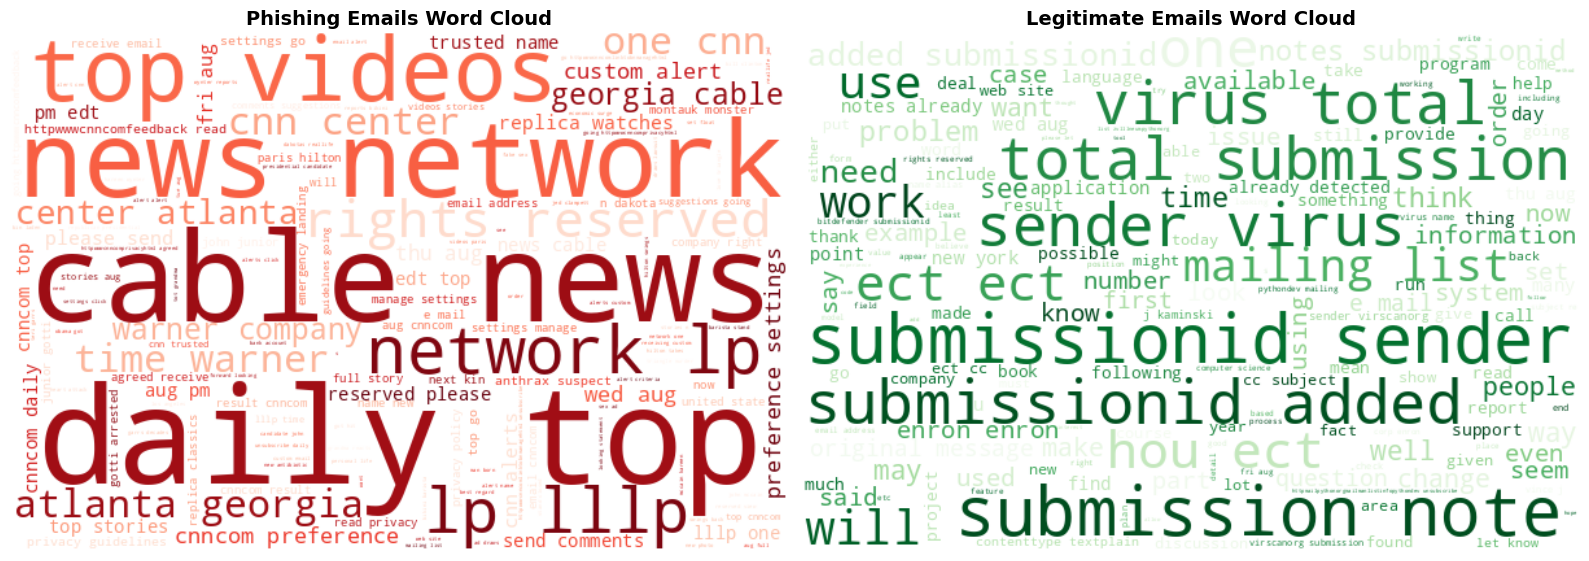


ANALYZING FREQUENCY DIFFERENCES...

TOP 20 PHISHING INDICATORS (Frequency Difference):
Word            Diff     Phishing   Legit     
--------------------------------------------------
top             +0.4959     0.5834     0.0875
cnncom          +0.4001     0.4008     0.0007
cnn             +0.2999     0.3024     0.0026
news            +0.2807     0.4139     0.1332
money           +0.2498     0.3209     0.0712
cable           +0.2380     0.2486     0.0107
daily           +0.2300     0.2941     0.0641
replica         +0.2142     0.2159     0.0018
settings        +0.2138     0.2410     0.0272
account         +0.1791     0.2512     0.0721
alert           +0.1732     0.2065     0.0333
aug             +0.1658     0.4630     0.2971
lllp            +0.1616     0.1616     0.0000
videos          +0.1593     0.1689     0.0096
your            +0.1585     0.6719     0.5134
watches         +0.1575     0.1594     0.0018
lp              +0.1562     0.1632     0.0070
network         +0.1553     0.25

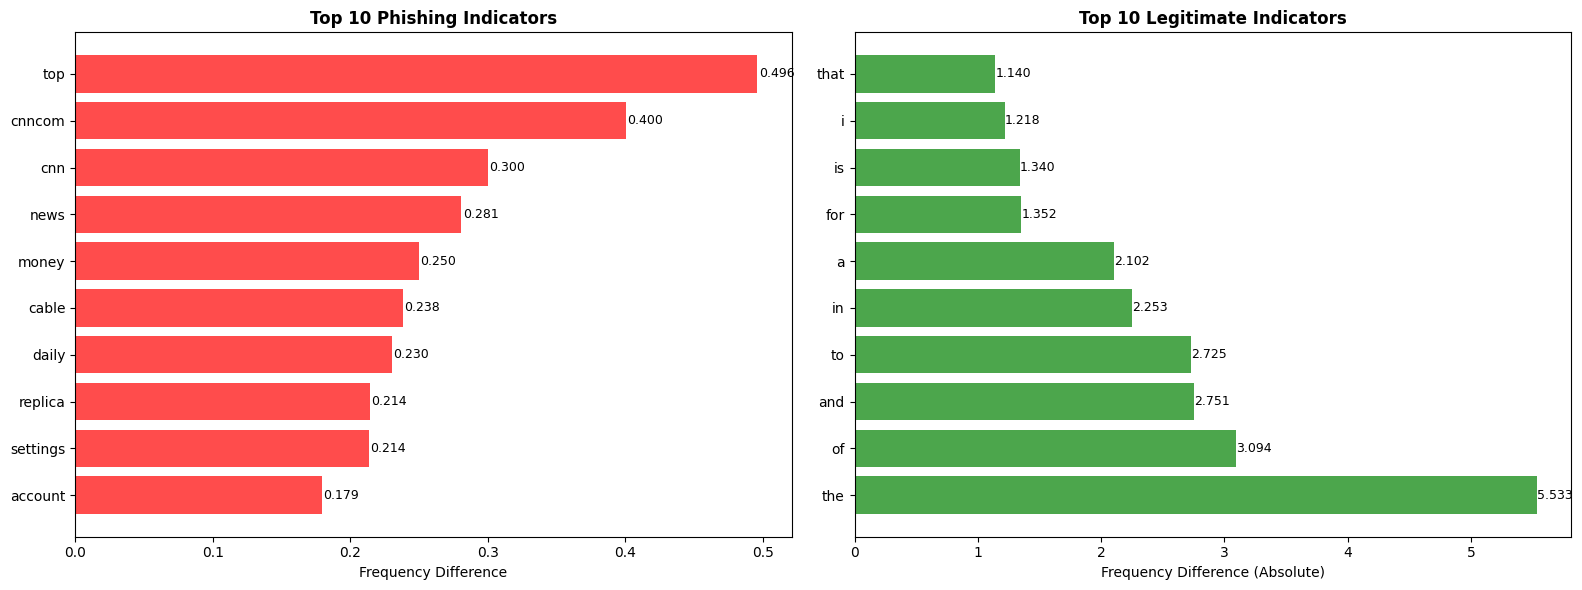


TF-IDF ANALYSIS FOR DISTINCTIVE WORDS...

TOP 20 DISTINCTIVE PHISHING WORDS (TF-IDF):
Word            TF-IDF Diff  Phishing   Legit     
-------------------------------------------------------
network            +0.0176     0.0288     0.0112
receive            +0.0197     0.0281     0.0084
free               +0.0212     0.0405     0.0194
site               +0.0220     0.0353     0.0133
http               +0.0233     0.0368     0.0135
settings           +0.0249     0.0288     0.0039
alert              +0.0250     0.0291     0.0041
company            +0.0261     0.0372     0.0111
account            +0.0268     0.0351     0.0084
wed                +0.0270     0.0588     0.0317
thu                +0.0277     0.0553     0.0276
daily              +0.0287     0.0374     0.0087
cable              +0.0294     0.0306     0.0012
best               +0.0301     0.0485     0.0184
news               +0.0356     0.0467     0.0111
cnn                +0.0373     0.0376     0.0003
click              +0.

In [15]:
# Comprehensive Phishing Email Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import re

class PhishingAnalyzer:
    def __init__(self, data):
        self.data = data
        self.phishing_emails = None
        self.legitimate_emails = None
        self.phishing_words = None
        self.legitimate_words = None

    def preprocess_text(self, text):
        """Clean and preprocess email text"""
        if pd.isna(text) or text == '':
            return ''
        text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower())
        return ' '.join(text.split())

    def prepare_data(self):
        """Preprocess data and separate classes"""
        print("Preprocessing data...")
        self.data['clean_text'] = self.data['email_text'].apply(self.preprocess_text)

        print(f"Dataset: {self.data.shape[0]} emails")
        print(f"Label distribution:\n{self.data['phishing'].value_counts()}")

        # Separate classes
        self.phishing_emails = self.data[self.data['phishing'] == 1]['clean_text']
        self.legitimate_emails = self.data[self.data['phishing'] == 0]['clean_text']

        print(f"Phishing: {len(self.phishing_emails)}, Legitimate: {len(self.legitimate_emails)}")

        # Word frequency analysis
        self.phishing_words = Counter(' '.join(self.phishing_emails).split())
        self.legitimate_words = Counter(' '.join(self.legitimate_emails).split())

    def analyze_frequency(self, top_n=20):
        """1) Analyze frequency - top N most common words in each category"""
        print(f"\n{'='*60}")
        print(f"TOP {top_n} MOST COMMON PHISHING WORDS:")
        print(f"{'Word':<15} {'Count':<8} {'Frequency':<10}")
        print("-" * 40)

        for word, count in self.phishing_words.most_common(top_n):
            frequency = count / len(self.phishing_emails)
            print(f"{word:<15} {count:<8} {frequency:<10.4f}")

        print(f"\nTOP {top_n} MOST COMMON LEGITIMATE WORDS:")
        print(f"{'Word':<15} {'Count':<8} {'Frequency':<10}")
        print("-" * 40)

        for word, count in self.legitimate_words.most_common(top_n):
            frequency = count / len(self.legitimate_emails)
            print(f"{word:<15} {count:<8} {frequency:<10.4f}")

    def create_word_clouds(self):
        """2) Generate word clouds for both categories"""
        print(f"\n{'='*60}")
        print("GENERATING WORD CLOUDS...")

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

        # Phishing word cloud
        phishing_text = ' '.join(self.phishing_emails)
        wc_phishing = WordCloud(width=600, height=400,
                               background_color='white',
                               colormap='Reds').generate(phishing_text)
        ax1.imshow(wc_phishing, interpolation='bilinear')
        ax1.set_title('Phishing Emails Word Cloud', fontsize=14, fontweight='bold')
        ax1.axis('off')

        # Legitimate word cloud
        legitimate_text = ' '.join(self.legitimate_emails)
        wc_legitimate = WordCloud(width=600, height=400,
                                 background_color='white',
                                 colormap='Greens').generate(legitimate_text)
        ax2.imshow(wc_legitimate, interpolation='bilinear')
        ax2.set_title('Legitimate Emails Word Cloud', fontsize=14, fontweight='bold')
        ax2.axis('off')

        plt.tight_layout()
        plt.show()

    def analyze_frequency_difference(self, top_n=20, min_occurrences=5):
        """3) Analyze frequency differences between categories"""
        print(f"\n{'='*60}")
        print("ANALYZING FREQUENCY DIFFERENCES...")

        all_words = set(self.phishing_words.keys()) | set(self.legitimate_words.keys())

        # Calculate normalized frequency differences
        freq_diff = {}
        for word in all_words:
            p_freq = self.phishing_words.get(word, 0) / len(self.phishing_emails)
            l_freq = self.legitimate_words.get(word, 0) / len(self.legitimate_emails)
            freq_diff[word] = p_freq - l_freq

        # Filter words appearing at least min_occurrences times total
        filtered_words = {word: diff for word, diff in freq_diff.items()
                         if (self.phishing_words.get(word, 0) +
                             self.legitimate_words.get(word, 0)) >= min_occurrences}

        sorted_diff = sorted(filtered_words.items(), key=lambda x: x[1], reverse=True)

        # Display results
        print(f"\nTOP {top_n} PHISHING INDICATORS (Frequency Difference):")
        print(f"{'Word':<15} {'Diff':<8} {'Phishing':<10} {'Legit':<10}")
        print("-" * 50)
        for word, diff in sorted_diff[:top_n]:
            p_freq = self.phishing_words.get(word, 0) / len(self.phishing_emails)
            l_freq = self.legitimate_words.get(word, 0) / len(self.legitimate_emails)
            print(f"{word:<15} {diff:>+7.4f}   {p_freq:>8.4f}   {l_freq:>8.4f}")

        print(f"\nTOP {top_n} LEGITIMATE INDICATORS (Frequency Difference):")
        print(f"{'Word':<15} {'Diff':<8} {'Phishing':<10} {'Legit':<10}")
        print("-" * 50)
        for word, diff in sorted_diff[-top_n:]:
            p_freq = self.phishing_words.get(word, 0) / len(self.phishing_emails)
            l_freq = self.legitimate_words.get(word, 0) / len(self.legitimate_emails)
            print(f"{word:<15} {diff:>+7.4f}   {p_freq:>8.4f}   {l_freq:>8.4f}")

        return sorted_diff

    def visualize_frequency_differences(self, sorted_diff, top_n=10):
        """Visualize frequency differences with bar charts"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

        # Top phishing indicators
        top_phishing = sorted_diff[:top_n]
        words_p, diffs_p = zip(*top_phishing)
        bars1 = ax1.barh(range(len(words_p)), diffs_p, color='red', alpha=0.7)
        ax1.set_yticks(range(len(words_p)))
        ax1.set_yticklabels(words_p)
        ax1.set_title(f'Top {top_n} Phishing Indicators', fontsize=12, fontweight='bold')
        ax1.set_xlabel('Frequency Difference')
        ax1.invert_yaxis()

        # Add value labels on bars
        for i, bar in enumerate(bars1):
            width = bar.get_width()
            ax1.text(width + 0.001, bar.get_y() + bar.get_height()/2,
                    f'{width:.3f}', ha='left', va='center', fontsize=9)

        # Top legitimate indicators
        top_legitimate = sorted_diff[-top_n:]
        words_l, diffs_l = zip(*top_legitimate)
        bars2 = ax2.barh(range(len(words_l)), [abs(d) for d in diffs_l],
                        color='green', alpha=0.7)
        ax2.set_yticks(range(len(words_l)))
        ax2.set_yticklabels(words_l)
        ax2.set_title(f'Top {top_n} Legitimate Indicators', fontsize=12, fontweight='bold')
        ax2.set_xlabel('Frequency Difference (Absolute)')
        ax2.invert_yaxis()

        # Add value labels on bars
        for i, bar in enumerate(bars2):
            width = bar.get_width()
            ax2.text(width + 0.001, bar.get_y() + bar.get_height()/2,
                    f'{width:.3f}', ha='left', va='center', fontsize=9)

        plt.tight_layout()
        plt.show()

    def tfidf_analysis(self, max_features=50, top_n=20):
        """4) TF-IDF analysis for distinctive words"""
        print(f"\n{'='*60}")
        print("TF-IDF ANALYSIS FOR DISTINCTIVE WORDS...")

        tfidf = TfidfVectorizer(max_features=max_features, stop_words='english')
        tfidf_matrix = tfidf.fit_transform(self.data['clean_text'])
        feature_names = tfidf.get_feature_names_out()

        phishing_indices = self.data[self.data['phishing'] == 1].index
        legitimate_indices = self.data[self.data['phishing'] == 0].index

        phishing_tfidf = tfidf_matrix[phishing_indices].mean(axis=0).A1
        legitimate_tfidf = tfidf_matrix[legitimate_indices].mean(axis=0).A1
        tfidf_diff = phishing_tfidf - legitimate_tfidf

        print(f"\nTOP {top_n} DISTINCTIVE PHISHING WORDS (TF-IDF):")
        print(f"{'Word':<15} {'TF-IDF Diff':<12} {'Phishing':<10} {'Legit':<10}")
        print("-" * 55)
        for i in tfidf_diff.argsort()[-top_n:]:
            word = feature_names[i]
            diff = tfidf_diff[i]
            p_score = phishing_tfidf[i]
            l_score = legitimate_tfidf[i]
            print(f"{word:<15} {diff:>+10.4f}   {p_score:>8.4f}   {l_score:>8.4f}")

        print(f"\nTOP {top_n} DISTINCTIVE LEGITIMATE WORDS (TF-IDF):")
        print(f"{'Word':<15} {'TF-IDF Diff':<12} {'Phishing':<10} {'Legit':<10}")
        print("-" * 55)
        for i in tfidf_diff.argsort()[:top_n]:
            word = feature_names[i]
            diff = tfidf_diff[i]
            p_score = phishing_tfidf[i]
            l_score = legitimate_tfidf[i]
            print(f"{word:<15} {diff:>+10.4f}   {p_score:>8.4f}   {l_score:>8.4f}")

    def run_complete_analysis(self, top_n=20):
        """Run all analyses in sequence"""
        self.prepare_data()

        # 1) Frequency analysis
        self.analyze_frequency(top_n)

        # 2) Word clouds
        self.create_word_clouds()

        # 3) Frequency differences
        sorted_diff = self.analyze_frequency_difference(top_n)
        self.visualize_frequency_differences(sorted_diff, top_n//2)

        # 4) TF-IDF analysis
        self.tfidf_analysis(max_features=100, top_n=top_n)

analyzer = PhishingAnalyzer(train)
analyzer.run_complete_analysis(top_n=20)